<a href="https://colab.research.google.com/github/mrinalinimurugan/Tensorflow-with-Keras/blob/main/08_tf_Intro_to_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Intro to NLP -derive info out of natural lang

!nvidia-smi -L

GPU 0: Tesla K80 (UUID: GPU-6afa053f-856c-a38d-6cda-cf1b79e3a5e8)


In [2]:
#Get the helper functions
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2022-02-09 14:48:49--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-02-09 14:48:49 (48.5 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [3]:
from helper_functions import unzip_data,create_tensorboard_callback,plot_loss_curves,compare_historys


In [4]:
#Get a text dataset

!wget https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip

--2022-02-09 14:48:52--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.6.128, 142.250.159.128, 74.125.70.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.6.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.006s  

2022-02-09 14:48:52 (102 MB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



In [5]:
unzip_data("nlp_getting_started.zip")

In [6]:
#Visualize a text dataset
import pandas as pd
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [7]:
train_df["text"][1]

'Forest fire near La Ronge Sask. Canada'

In [8]:
#shuffle training dataframe
train_df_shuffled = train_df.sample(frac=1,random_state=42)
train_df_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [9]:
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [10]:
train_df.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [11]:
#Visualize random training samples
import random 
random_index = random.randint(0,len(train_df)-5)
for row in train_df_shuffled[["text","target"]][random_index:random_index+5].itertuples():
  _, text,target = row
  print(f"Target: {target}", "(real disaster)" if target>0 else "(not real disaster)")
  print(f"Text:\n{text}\n")
  print("---\n")

Target: 0 (not real disaster)
Text:
Reusing advanced in life equipments in transit to drumming champaign damage: FdbDP

---

Target: 0 (not real disaster)
Text:
Self destruction mode! ???? https://t.co/ZtYZhbvzqP

---

Target: 1 (real disaster)
Text:
World Annihilation vs Self Transformation http://t.co/pyehwodWun Aliens Attack to Exterminate Humans http://t.co/8jxqL8Cv8Z

---

Target: 0 (not real disaster)
Text:
70 won 70...&amp; some think possibility of my full transformation is impossible.  I don't quite like medical mysteries. BIOTERRORISM sucks.

---

Target: 0 (not real disaster)
Text:
Newlyweds feed thousands of Syrian refugees instead of hosting a banquet wedding dinner http://t.co/EGcv7ybjae #Age #news

---



In [12]:
#Split data into training and validation
from sklearn.model_selection import train_test_split

#Use train test split to split training data into training and validation sets
train_sentences,val_sentences,train_labels,val_labels = train_test_split(train_df_shuffled["text"].to_numpy(),
                                                            train_df_shuffled["target"].to_numpy(),
                                                            test_size=0.1,
                                                            random_state=42)


In [13]:
#Check the lengths 
len(train_sentences),len(train_labels),len(val_sentences),len(val_labels)

(6851, 6851, 762, 762)

In [14]:
#Check the first 10 samples
train_sentences[:10],train_labels[:10]

(array(['@mogacola @zamtriossu i screamed after hitting tweet',
        'Imagine getting flattened by Kurt Zouma',
        '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
        "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
        'Somehow find you and I collide http://t.co/Ee8RpOahPk',
        '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
        'destroy the free fandom honestly',
        'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
        '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
        'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
       dtype=object), array([0, 

In [15]:
#Converting text into numbers
#Text vectorization
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

#Use the default textvectorizer parameters
text_vectorizer = TextVectorization(max_tokens=None,
                                    standardize="lower_and_strip_punctuation",
                                    split="whitespace",
                                    ngrams=None,
                                    output_mode="int",
                                    output_sequence_length=None)
                                    #pad_to_max_tokens=False)

In [16]:
#Find the average number of tokens(words) in the training tweets
round(sum([len(i.split()) for i in train_sentences])/len(train_sentences))

15

In [17]:
#Setup text vectorization variables
max_vocab_length = 1000
max_length = 15
text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode="int",
                                    output_sequence_length=max_length)

In [18]:
#Fit the text vectorizer 
text_vectorizer.adapt(train_sentences)

In [19]:
#Create a sample sentence and tokenize it
sample_sentence = "There's a flood in my street!"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[264,   3, 232,   4,  13, 698,   0,   0,   0,   0,   0,   0,   0,
          0,   0]])>

In [20]:
#Choose a random sentence from the training dataset nd tokenize it
random_sentence = random.choice(train_sentences)
print(f"Original text:\n {random_sentence}\
        \n\nVectorized version:")
text_vectorizer([random_sentence])

Original text:
 @tanehisicoates even the second half has that great Greek Tragedy laced monologue by Charlize. coulda been so much more.        

Vectorized version:


<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[  1, 151,   2, 642, 575,  41,  16, 196,   1, 360,   1,   1,  18,
          1,   1]])>

In [21]:
#Get the unique words in the vocabulary
words_in_vocab = text_vectorizer.get_vocabulary()
top_5_words = words_in_vocab[:5]
bottom_5_words = words_in_vocab[-5:]
print(f"Number of words in vocab: {len(words_in_vocab)}")
print(f"5 most common words: {(top_5_words)}")
print(f"5 least common words: {(bottom_5_words)}")

Number of words in vocab: 1000
5 most common words: ['', '[UNK]', 'the', 'a', 'in']
5 least common words: ['reported', 'r', 'pray', 'playlist', 'patience']


In [22]:
#Creating an embedding using an embedding layer

from tensorflow.keras import layers
embedding = layers.Embedding(input_dim=max_vocab_length,
                             output_dim=128,
                             embeddings_initializer="uniform",
                             input_length=max_length,
                             name="embedding_1")

In [23]:
embedding

In [24]:
#Get a random sentence from the training set
random_sentence = random.choice(train_sentences)
print(f"Original text:\n {random_sentence}\
\n\nEmbedded version:")

#Embed the random sentence
sample_embed = embedding(text_vectorizer([random_sentence]))
sample_embed

Original text:
 The ship has arrived safely. So it was quite unnecessary to sign the waiver that we won't sue Microsoft if any hijacking occurred.

Embedded version:


<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[-0.02870891, -0.02060667,  0.02970343, ..., -0.00820082,
         -0.02413008, -0.04576927],
        [-0.02693601, -0.04993994,  0.03144203, ...,  0.01584316,
         -0.04929977, -0.03683491],
        [ 0.04941993, -0.02667569, -0.00145844, ..., -0.00302138,
          0.02995757,  0.02993883],
        ...,
        [-0.02870891, -0.02060667,  0.02970343, ..., -0.00820082,
         -0.02413008, -0.04576927],
        [-0.04974773, -0.04347875,  0.02480935, ..., -0.01957983,
         -0.03898285,  0.03624776],
        [-0.02638303, -0.03487142,  0.04713548, ...,  0.02231011,
          0.04935839, -0.04576999]]], dtype=float32)>

In [25]:
#Check out a single tokens embeddings
sample_embed[0][0],sample_embed[0][0].shape,random_sentence

(<tf.Tensor: shape=(128,), dtype=float32, numpy=
 array([-0.02870891, -0.02060667,  0.02970343, -0.03337188,  0.02999641,
         0.02729727, -0.03772513,  0.0108314 ,  0.017862  , -0.04884151,
         0.04736571, -0.02840396, -0.04462368, -0.02088344, -0.03831219,
         0.03939201, -0.00014675, -0.0333992 , -0.02992905, -0.01829486,
         0.01558078, -0.00838456, -0.00804759,  0.04088578, -0.04696133,
        -0.02211399, -0.00387633, -0.0008839 , -0.02538791, -0.03442733,
        -0.04127258, -0.02062595, -0.03258516,  0.01431515, -0.04274577,
         0.04088639,  0.02191664, -0.0102474 , -0.04855082, -0.03327887,
        -0.04598957,  0.0426315 ,  0.04221882, -0.01442508,  0.00759729,
        -0.02292641, -0.02591333, -0.00540654,  0.03085482,  0.02965054,
         0.02723051, -0.01480361, -0.00333621,  0.01680929,  0.00220345,
         0.02347903,  0.00404987, -0.02792799, -0.01783234, -0.02500623,
         0.00763003,  0.03969364, -0.02478685,  0.02286048, -0.01083096,
  

In [26]:
#Modelling a text dataset

#Model 0:Getting a baseline

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

#Create tokenization and modelling pipeline
model_0 = Pipeline([
                    ("tfidf",TfidfVectorizer()),
                    ("clf",MultinomialNB())
])

#Fit the pipeline to the training data
model_0.fit(train_sentences,train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [27]:
#Evaluate our base model
baseline_score = model_0.score(val_sentences,val_labels)
print(f"Our baseline model achieves an accuracy of: {baseline_score*100:.2f}%")

Our baseline model achieves an accuracy of: 79.27%


In [28]:
train_df.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [29]:
#Make predictions
baseline_preds = model_0.predict(val_sentences)
baseline_preds[:20]

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1])

In [30]:
train_labels

array([0, 0, 1, ..., 1, 1, 0])

In [31]:
#Creating an evaluation function for our model experiments

from sklearn.metrics import accuracy_score,precision_recall_fscore_support

def calculate_results(y_true,y_pred):
  #Calculate model accuracy
  model_accuracy = accuracy_score(y_true,y_pred)*100

  #Calculate model precision,recall and f1-score using "weighted" average
  model_precision,model_recall,model_f1,_ = precision_recall_fscore_support(y_true,y_pred,average="weighted")
  model_results = {"accuracy": model_accuracy,
                  "precision":model_precision,
                  "recall":model_recall,
                  "f1":model_f1}
  return model_results

In [32]:
#Get baseline results
baseline_results = calculate_results(y_true=val_labels,
                                     y_pred=baseline_preds)

In [33]:
baseline_results

{'accuracy': 79.26509186351706,
 'f1': 0.7862189758049549,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706}

In [34]:
#Model 1:Feed Forward neural network

#A simple dense model

#Create a tensorboard callback
from helper_functions import create_tensorboard_callback

#Create a directory to save tensorboard logs
SAVE_DIR = "model_logs"

In [35]:
#Build model with the Functional API
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,),dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(1,activation="sigmoid")(x)
model_1 = tf.keras.Model(inputs,outputs,name="model_1_dense")

In [36]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding_1 (Embedding)     (None, 15, 128)           128000    
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 128,129
Trainable params: 128,129
Non-t

In [37]:
#Compile model
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [38]:
#Fit the model
model_1_history = model_1.fit(x=train_sentences,
                              y=train_labels,
                              epochs=5,
                              validation_data=(val_sentences,val_labels),
                              callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                     experiment_name="model_1_dense")])

Saving TensorBoard log files to: model_logs/model_1_dense/20220209-144857
Epoch 1/5
215/215 [==============================] - 4s 8ms/step - loss: 0.6226 - accuracy: 0.6694 - val_loss: 0.5641 - val_accuracy: 0.7270
Epoch 2/5
215/215 [==============================] - 3s 12ms/step - loss: 0.4939 - accuracy: 0.7758 - val_loss: 0.5049 - val_accuracy: 0.7651
Epoch 3/5
215/215 [==============================] - 3s 12ms/step - loss: 0.4381 - accuracy: 0.8075 - val_loss: 0.4855 - val_accuracy: 0.7703
Epoch 4/5
215/215 [==============================] - 3s 13ms/step - loss: 0.4107 - accuracy: 0.8181 - val_loss: 0.4837 - val_accuracy: 0.7638
Epoch 5/5
215/215 [==============================] - 3s 13ms/step - loss: 0.3957 - accuracy: 0.8237 - val_loss: 0.4946 - val_accuracy: 0.7808


In [39]:
baseline_results

{'accuracy': 79.26509186351706,
 'f1': 0.7862189758049549,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706}

In [40]:
#Check the results
model_1.evaluate(val_sentences,val_labels)

24/24 [==============================] - 0s 8ms/step - loss: 0.4946 - accuracy: 0.7808


[0.4945613741874695, 0.7808399200439453]

In [41]:
model_1_pred_probs = model_1.predict(val_sentences)

In [42]:
model_1_pred_probs.shape

(762, 1)

In [43]:
#Single prediction
model_1_pred_probs[0]

array([0.48073056], dtype=float32)

In [44]:
#Convert model prediction probabitlity to label form
model_1_preds = tf.squeeze(tf.round(model_1_pred_probs))
model_1_preds[:20]

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0.], dtype=float32)>

In [45]:
#Calculate our model_1 results
model_1_results = calculate_results(val_labels,model_1_preds)
model_1_results

{'accuracy': 78.08398950131233,
 'f1': 0.7763538446777619,
 'precision': 0.7897480394521932,
 'recall': 0.7808398950131233}

In [46]:
baseline_results

{'accuracy': 79.26509186351706,
 'f1': 0.7862189758049549,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706}

In [47]:
import numpy as np
np.array(list(model_1_results.values()))>np.array(list(baseline_results.values()))

array([False, False, False, False])

In [48]:
#Visualizing learned embeddings

#Get the vocabulary from the text vectorization layer
words_in_vocab = text_vectorizer.get_vocabulary()
len(words_in_vocab),words_in_vocab[:10]

(1000, ['', '[UNK]', 'the', 'a', 'in', 'to', 'of', 'and', 'i', 'is'])

In [49]:
#Model 1 summary
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding_1 (Embedding)     (None, 15, 128)           128000    
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 128,129
Trainable params: 128,129
Non-t

In [50]:
#Get the weight matrix of embedding layer
embed_weights = model_1.get_layer("embedding_1").get_weights()[0]
embed_weights.shape

(1000, 128)

In [51]:
embed_weights

array([[-0.05584282, -0.06437565,  0.01991131, ..., -0.05363748,
         0.03046303,  0.0473542 ],
       [-0.06538931, -0.06060594,  0.01227459, ..., -0.03436746,
        -0.02404197,  0.05355343],
       [-0.05082918, -0.04177281,  0.00479451, ..., -0.03236456,
         0.00037524, -0.02467229],
       ...,
       [-0.0135929 ,  0.02790726, -0.05102418, ...,  0.0289972 ,
        -0.03586873, -0.00768065],
       [-0.03907254, -0.08942519, -0.10268227, ..., -0.0885416 ,
         0.09047333,  0.09579145],
       [ 0.00428048,  0.00934062,  0.03222235, ...,  0.00928534,
        -0.04855602, -0.03859946]], dtype=float32)

In [52]:
#Create embedding files
import io
out_v = io.open('vectors.tsv', 'w', encoding='utf-8')
out_m = io.open('metadata.tsv', 'w', encoding='utf-8')

for index, word in enumerate(words_in_vocab):
  if index == 0:
    continue  # skip 0, it's padding.
  vec = embed_weights[index]
  out_v.write('\t'.join([str(x) for x in vec]) + "\n")
  out_m.write(word + "\n")
out_v.close()
out_m.close()

In [53]:
#Download files from colab to upload to prejector
try:
  from google.colab import files
  files.download('vectors.tsv')
  files.download('metadata.tsv')
except Exception:
  pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [54]:
#Recurrent neural networks(RNN's)
train_sentences[:10]

array(['@mogacola @zamtriossu i screamed after hitting tweet',
       'Imagine getting flattened by Kurt Zouma',
       '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
       "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
       'Somehow find you and I collide http://t.co/Ee8RpOahPk',
       '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
       'destroy the free fandom honestly',
       'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
       '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
       'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
      dtype=object)

In [55]:
#Model 2:LSTM

#Create an LSTM model
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,),dtype='string')
x=text_vectorizer(inputs)
x=embedding(x)
#print(x.shape)
#x=layers.LSTM(units=64,return_sequences=True)(x)
#print(x.shape)
x=layers.LSTM(64)(x)
#print(x.shape)
#x= layers.Dense(64,activation='relu')(x)
#print(x.shape)
outputs = layers.Dense(1,activation='sigmoid')(x)
model_2 = tf.keras.Model(inputs,outputs,name='model_2_LSTM')

In [56]:
model_2.summary()

Model: "model_2_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding_1 (Embedding)     (None, 15, 128)           128000    
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 177,473
Trainable params: 177,473
Non-trainable params: 0
________________________________________________

In [57]:
model_2.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [58]:
model_2_history = model_2.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences,val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     'model_2_LSTM')])

Saving TensorBoard log files to: model_logs/model_2_LSTM/20220209-144915
Epoch 1/5
215/215 [==============================] - 12s 21ms/step - loss: 0.4097 - accuracy: 0.8174 - val_loss: 0.4874 - val_accuracy: 0.7795
Epoch 2/5
215/215 [==============================] - 3s 15ms/step - loss: 0.3806 - accuracy: 0.8324 - val_loss: 0.4956 - val_accuracy: 0.7808
Epoch 3/5
215/215 [==============================] - 3s 15ms/step - loss: 0.3697 - accuracy: 0.8377 - val_loss: 0.4988 - val_accuracy: 0.7717
Epoch 4/5
215/215 [==============================] - 3s 15ms/step - loss: 0.3548 - accuracy: 0.8450 - val_loss: 0.5012 - val_accuracy: 0.7769
Epoch 5/5
215/215 [==============================] - 3s 15ms/step - loss: 0.3356 - accuracy: 0.8558 - val_loss: 0.5125 - val_accuracy: 0.7690


In [59]:
#MAke predictions with LSTM model
model_2_pred_probs = model_2.predict(val_sentences)
model_2_pred_probs[:10]

array([[0.7230307 ],
       [0.7412786 ],
       [0.9633158 ],
       [0.07608384],
       [0.07966381],
       [0.99275666],
       [0.95323664],
       [0.84185576],
       [0.7389994 ],
       [0.1535631 ]], dtype=float32)

In [60]:
#Convert model 2 pred probs to labels
model_2_preds = tf.squeeze(tf.round(model_2_pred_probs))
model_2_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [61]:
#Calculate model 2 results
model_2_results = calculate_results(y_true=val_labels,
                                    y_pred=model_2_preds)

In [62]:
model_2_results

{'accuracy': 76.9028871391076,
 'f1': 0.7669342344352704,
 'precision': 0.7706028054440214,
 'recall': 0.7690288713910761}

In [63]:
baseline_results

{'accuracy': 79.26509186351706,
 'f1': 0.7862189758049549,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706}

In [64]:
#Model 3:GRU

#Build an RNN using GRUcell
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,),dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.GRU(64)(x)
#print(x.shape)
#x=layers.GRU(64,return_sequences=True)(x)
#print(x.shape)
#x = layers.LSTM(42,return_sequences=True)(x)
#print(x.shape)
#x = layers.GRU(99)(x)
#print(x.shape)
#x = layers.Dense(64,activation='relu')(x)
outputs = layers.Dense(1,activation='sigmoid')(x)
model_3 = tf.keras.Model(inputs,outputs,name='model_3_GRU')

In [65]:
model_3.summary()

Model: "model_3_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding_1 (Embedding)     (None, 15, 128)           128000    
                                                                 
 gru (GRU)                   (None, 64)                37248     
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 165,313
Trainable params: 165,313
Non-trainable params: 0
_________________________________________________

In [66]:
model_3.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [67]:
model_3_history = model_3.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences,val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     'model_3_GRU')])

Saving TensorBoard log files to: model_logs/model_3_GRU/20220209-144942
Epoch 1/5
215/215 [==============================] - 8s 20ms/step - loss: 0.3981 - accuracy: 0.8234 - val_loss: 0.4963 - val_accuracy: 0.7572
Epoch 2/5
215/215 [==============================] - 3s 14ms/step - loss: 0.3405 - accuracy: 0.8572 - val_loss: 0.5212 - val_accuracy: 0.7690
Epoch 3/5
215/215 [==============================] - 3s 14ms/step - loss: 0.3161 - accuracy: 0.8678 - val_loss: 0.5164 - val_accuracy: 0.7664
Epoch 4/5
215/215 [==============================] - 3s 15ms/step - loss: 0.2956 - accuracy: 0.8784 - val_loss: 0.5649 - val_accuracy: 0.7585
Epoch 5/5
215/215 [==============================] - 3s 14ms/step - loss: 0.2780 - accuracy: 0.8835 - val_loss: 0.6250 - val_accuracy: 0.7572


In [68]:
#MAke predictions with GRU model
model_3_pred_probs = model_3.predict(val_sentences)
model_3_pred_probs[:10]

array([[0.78632516],
       [0.587849  ],
       [0.9831903 ],
       [0.03684431],
       [0.04250072],
       [0.9989207 ],
       [0.9937583 ],
       [0.89713806],
       [0.6252856 ],
       [0.11646853]], dtype=float32)

In [69]:
#Convert model 3 pred probs to labels
model_3_preds = tf.squeeze(tf.round(model_3_pred_probs))
model_3_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [70]:
#Calculate model 3 results
model_3_results = calculate_results(y_true=val_labels,
                                    y_pred=model_3_preds)
model_3_results

{'accuracy': 75.7217847769029,
 'f1': 0.7543632423639389,
 'precision': 0.7596733982700739,
 'recall': 0.7572178477690289}

In [71]:
#Model 4:Bidirectional RNN

#Build a bidirectional RNN in tensorflow
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,),dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
#x = layers.Bidirectional(layers.LSTM(64,return_sequences=True))(x)
x = layers.Bidirectional(layers.LSTM(64))(x)
outputs = layers.Dense(1,activation='sigmoid')(x)
model_4 = tf.keras.Model(inputs,outputs,name='model_4_bidirectional')

In [72]:
model_4.summary()

Model: "model_4_bidirectional"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding_1 (Embedding)     (None, 15, 128)           128000    
                                                                 
 bidirectional (Bidirectiona  (None, 128)              98816     
 l)                                                              
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 226,945
Trainable params: 226,9

In [73]:
model_4.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [74]:
model_4_history = model_4.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences,val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     'model_4_bidirectional')])

Saving TensorBoard log files to: model_logs/model_4_bidirectional/20220209-145006
Epoch 1/5
215/215 [==============================] - 12s 26ms/step - loss: 0.3513 - accuracy: 0.8511 - val_loss: 0.5751 - val_accuracy: 0.7572
Epoch 2/5
215/215 [==============================] - 5s 21ms/step - loss: 0.2856 - accuracy: 0.8832 - val_loss: 0.6323 - val_accuracy: 0.7690
Epoch 3/5
215/215 [==============================] - 4s 20ms/step - loss: 0.2678 - accuracy: 0.8894 - val_loss: 0.6563 - val_accuracy: 0.7507
Epoch 4/5
215/215 [==============================] - 5s 23ms/step - loss: 0.2463 - accuracy: 0.8981 - val_loss: 0.7123 - val_accuracy: 0.7520
Epoch 5/5
215/215 [==============================] - 5s 24ms/step - loss: 0.2317 - accuracy: 0.9070 - val_loss: 0.7437 - val_accuracy: 0.7572


In [75]:
#MAke predictions with bidirectional model
model_4_pred_probs = model_4.predict(val_sentences)
model_4_pred_probs[:10]

array([[0.86588186],
       [0.8679005 ],
       [0.9882891 ],
       [0.05040484],
       [0.02074131],
       [0.99852246],
       [0.9954137 ],
       [0.93635523],
       [0.86467767],
       [0.13714428]], dtype=float32)

In [76]:
#Convert model 4 pred probs to labels
model_4_preds = tf.squeeze(tf.round(model_4_pred_probs))
model_4_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [77]:
model_4_results = calculate_results(y_true=val_labels,
                                    y_pred=model_4_preds)
model_4_results

{'accuracy': 75.7217847769029,
 'f1': 0.7554724830368379,
 'precision': 0.7577805667624024,
 'recall': 0.7572178477690289}

In [78]:
model_3_results

{'accuracy': 75.7217847769029,
 'f1': 0.7543632423639389,
 'precision': 0.7596733982700739,
 'recall': 0.7572178477690289}

In [79]:
#Convolutional neural networks for text 
embedding_test = embedding(text_vectorizer(["this is a test sentence"]))
conv_1d = layers.Conv1D(filters=64,
                        kernel_size=5,
                        strides=1,
                        activation='relu',
                        padding='valid')
conv_1d_output = conv_1d(embedding_test)
max_pool = layers.GlobalMaxPool1D()
max_pool_output = max_pool(conv_1d_output)
embedding_test.shape,conv_1d_output.shape,max_pool_output.shape

(TensorShape([1, 15, 128]), TensorShape([1, 11, 64]), TensorShape([1, 64]))

In [80]:
#embedding_test

In [81]:
#conv_1d_output

In [82]:
#max_pool_output

In [83]:
#Create 1dim conv layer to model sequences
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,),dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Conv1D(filters=64,kernel_size=5,activation="relu",padding="valid",strides=1)(x)
x = layers.GlobalMaxPool1D()(x)
outputs = layers.Dense(1,activation='sigmoid')(x)
model_5 = tf.keras.Model(inputs,outputs,name='model_5_Conv1D')

model_5.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

model_5_history = model_5.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences,val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     'model_5_Conv1D')])
model_5.summary()

Saving TensorBoard log files to: model_logs/model_5_Conv1D/20220209-145047
Epoch 1/5
215/215 [==============================] - 6s 17ms/step - loss: 0.3700 - accuracy: 0.8393 - val_loss: 0.5485 - val_accuracy: 0.7677
Epoch 2/5
215/215 [==============================] - 3s 13ms/step - loss: 0.3326 - accuracy: 0.8593 - val_loss: 0.5434 - val_accuracy: 0.7651
Epoch 3/5
215/215 [==============================] - 3s 13ms/step - loss: 0.3074 - accuracy: 0.8704 - val_loss: 0.5628 - val_accuracy: 0.7625
Epoch 4/5
215/215 [==============================] - 3s 14ms/step - loss: 0.2761 - accuracy: 0.8894 - val_loss: 0.6168 - val_accuracy: 0.7598
Epoch 5/5
215/215 [==============================] - 3s 13ms/step - loss: 0.2474 - accuracy: 0.9000 - val_loss: 0.6875 - val_accuracy: 0.7520
Model: "model_5_Conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1)]               0   

In [84]:
#MAke predictions with bidirectional model
model_5_pred_probs = model_5.predict(val_sentences)
model_5_pred_probs[:10]

array([[0.86331624],
       [0.56878203],
       [0.92161924],
       [0.04785738],
       [0.0777825 ],
       [0.99998355],
       [0.32388392],
       [0.99344784],
       [0.22154364],
       [0.07992218]], dtype=float32)

In [85]:
#Convert model 5 pred probs to labels
model_5_preds = tf.squeeze(tf.round(model_5_pred_probs))
model_5_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 1., 1., 0., 0., 1., 0., 1., 0., 0.], dtype=float32)>

In [86]:
model_5_results = calculate_results(y_true=val_labels,
                                    y_pred=model_5_preds)
model_5_results

{'accuracy': 75.19685039370079,
 'f1': 0.7483944946347455,
 'precision': 0.7555317501896176,
 'recall': 0.7519685039370079}

In [87]:
baseline_results

{'accuracy': 79.26509186351706,
 'f1': 0.7862189758049549,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706}

In [88]:
#Model 6:Tensorflow Hub Pretrained Sentence Encoder

import tensorflow_hub as hub

embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")
embed_samples = embed([sample_sentence,
                    "When you can the universal sentence encoder on a sentence,it turns it into numbers."])
print(embed_samples[0][:50])

tf.Tensor(
[-0.01157024  0.0248591   0.0287805  -0.01271502  0.03971543  0.08827759
  0.02680986  0.05589837 -0.01068731 -0.0059729   0.00639324 -0.01819523
  0.00030817  0.09105891  0.05874644 -0.03180627  0.01512476 -0.05162928
  0.00991369 -0.06865346 -0.04209306  0.0267898   0.03011008  0.00321069
 -0.00337969 -0.04787359  0.02266718 -0.00985924 -0.04063614 -0.01292095
 -0.04666384  0.056303   -0.03949255  0.00517685  0.02495828 -0.07014439
  0.02871508  0.04947682 -0.00633971 -0.08960191  0.02807117 -0.00808362
 -0.01360601  0.05998649 -0.10361786 -0.05195372  0.00232955 -0.02332528
 -0.03758105  0.0332773 ], shape=(50,), dtype=float32)


In [89]:
embed_samples[0].shape

TensorShape([512])

In [90]:
#Create a Keras Layer using the USE pretrained layer from tensorflow hub
sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape=[],
                                        dtype=tf.string,
                                        trainable=False,
                                        name="USE")

In [91]:
#Create model using the sequential API
model_6 = tf.keras.Sequential([
                               sentence_encoder_layer,
                               layers.Dense(64,activation="relu"),
                               layers.Dense(1,activation="sigmoid",name='output_layer')
],name="model_6_USE")

model_6.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])
model_6.summary()


Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_5 (Dense)             (None, 64)                32832     
                                                                 
 output_layer (Dense)        (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [92]:
model_6_history = model_6.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences,val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     'tf_hub_sentence_encoder')])


Saving TensorBoard log files to: model_logs/tf_hub_sentence_encoder/20220209-145150
Epoch 1/5
215/215 [==============================] - 17s 45ms/step - loss: 0.4981 - accuracy: 0.7857 - val_loss: 0.4462 - val_accuracy: 0.8071
Epoch 2/5
215/215 [==============================] - 8s 35ms/step - loss: 0.4151 - accuracy: 0.8124 - val_loss: 0.4418 - val_accuracy: 0.8084
Epoch 3/5
215/215 [==============================] - 7s 31ms/step - loss: 0.4022 - accuracy: 0.8213 - val_loss: 0.4379 - val_accuracy: 0.8136
Epoch 4/5
215/215 [==============================] - 8s 36ms/step - loss: 0.3942 - accuracy: 0.8248 - val_loss: 0.4350 - val_accuracy: 0.8084
Epoch 5/5
215/215 [==============================] - 8s 36ms/step - loss: 0.3879 - accuracy: 0.8292 - val_loss: 0.4343 - val_accuracy: 0.8163


In [93]:
#MAke predictions with bidirectional model
model_6_pred_probs = model_6.predict(val_sentences)
model_6_pred_probs[:10]

array([[0.16381413],
       [0.7833245 ],
       [0.98853683],
       [0.19637105],
       [0.7463523 ],
       [0.7350181 ],
       [0.9836821 ],
       [0.9778325 ],
       [0.9424505 ],
       [0.08632322]], dtype=float32)

In [94]:
#Convert model 6 pred probs to labels
model_6_preds = tf.squeeze(tf.round(model_6_pred_probs))
model_6_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [95]:
model_6_results = calculate_results(y_true=val_labels,
                                    y_pred=model_6_preds)
model_6_results

{'accuracy': 81.62729658792651,
 'f1': 0.8149048737121865,
 'precision': 0.8181574920275534,
 'recall': 0.8162729658792651}

In [96]:
baseline_results

{'accuracy': 79.26509186351706,
 'f1': 0.7862189758049549,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706}

In [100]:
#Model 7:TF Hub pretrained USE but with 10% of training data
#This split has problem of data leakage
#Create subsets of 10% of training data
#train_10_percent = train_df_shuffled[["text","target"]].sample(frac=0.1,random_state=42)
#train_10_percent.head(),len(train_10_percent)
#train_sentences_10_percent = train_10_percent["text"].to_list()
#train_labels_10_percent = train_10_percent["target"].to_list()
#len(train_sentences_10_percent), len(train_labels_10_percent)


(761, 761)

In [116]:
#Making a better dataset split
train_10_percent_split = int(0.1*len(train_sentences))
train_sentences_10_percent = train_sentences[:train_10_percent_split]
train_labels_10_percent = train_labels[:train_10_percent_split]
len(train_labels_10_percent)

685

In [117]:
#Check the number of each labels in the updated training subset
pd.Series(np.array(train_labels_10_percent)).value_counts()

0    406
1    279
dtype: int64

In [118]:
#Check the number of targets in the subset of data
train_df_shuffled["target"].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [102]:
train_df_shuffled["target"].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [119]:
#Lets build a model same as model 6
#model_7 = tf.keras.models.clone_model(model_6)
model_7 = tf.keras.Sequential([
                               sentence_encoder_layer,
                               layers.Dense(64,activation="relu"),
                               layers.Dense(1,activation="sigmoid",name='output_layer')
],name="model_7_USE")
#compile model
model_7.compile(loss="binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_7.summary()

Model: "model_7_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_7 (Dense)             (None, 64)                32832     
                                                                 
 output_layer (Dense)        (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [120]:
#Fit the model
model_7_history = model_7.fit(train_sentences_10_percent,
                              train_labels_10_percent,
                              epochs=5,
                              validation_data=(val_sentences,val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "tf_hub_sentence_encoder_10_percent_correct_split")])

Saving TensorBoard log files to: model_logs/tf_hub_sentence_encoder_10_percent_correct_split/20220209-153209
Epoch 1/5
22/22 [==============================] - 3s 71ms/step - loss: 0.6769 - accuracy: 0.6219 - val_loss: 0.6559 - val_accuracy: 0.7126
Epoch 2/5
22/22 [==============================] - 2s 96ms/step - loss: 0.6098 - accuracy: 0.7985 - val_loss: 0.6000 - val_accuracy: 0.7546
Epoch 3/5
22/22 [==============================] - 2s 71ms/step - loss: 0.5344 - accuracy: 0.8219 - val_loss: 0.5402 - val_accuracy: 0.7690
Epoch 4/5
22/22 [==============================] - 1s 56ms/step - loss: 0.4695 - accuracy: 0.8248 - val_loss: 0.5084 - val_accuracy: 0.7743
Epoch 5/5
22/22 [==============================] - 1s 36ms/step - loss: 0.4271 - accuracy: 0.8234 - val_loss: 0.4883 - val_accuracy: 0.7782


In [121]:
#MAke predictions
model_7_pred_probs = model_7.predict(val_sentences)
model_7_pred_probs[:10]

array([[0.22371976],
       [0.61362857],
       [0.93097687],
       [0.35888568],
       [0.54648894],
       [0.6870587 ],
       [0.891711  ],
       [0.83219016],
       [0.85698044],
       [0.15196957]], dtype=float32)

In [122]:
model_7_preds = tf.squeeze(tf.round(model_7_pred_probs))
model_7_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [123]:
model_7_results = calculate_results(y_true=val_labels,
                                    y_pred=model_7_preds)
model_7_results

{'accuracy': 77.82152230971128,
 'f1': 0.7775081589477405,
 'precision': 0.7779972615729265,
 'recall': 0.7782152230971129}

In [124]:
model_6_results

{'accuracy': 81.62729658792651,
 'f1': 0.8149048737121865,
 'precision': 0.8181574920275534,
 'recall': 0.8162729658792651}

In [133]:
#Comparing the performance of each of our models
#Combine model results into df 
all_model_results = pd.DataFrame({"0_baseline":baseline_results,
                                  "1_simple_dense":model_1_results,
                                  "2_lstm":model_2_results,
                                  "3_gru":model_3_results,
                                  "4_birectional":model_4_results,
                                  "5_conv1d":model_5_results,
                                  "6_tf_hub_use_encoder":model_6_results,
                                  "7_tf_hub_use_encoder_10_percent":model_7_results,})
all_model_results = all_model_results.transpose()

In [134]:
#Reduce the accuracy to the same scale as other metrics
all_model_results["accuracy"] = all_model_results["accuracy"]/100
all_model_results

,accuracy,precision,recall,f1
0_baseline,0.792651,0.811139,0.792651,0.786219
1_simple_dense,0.780840,0.789748,0.780840,0.776354
2_lstm,0.769029,0.770603,0.769029,0.766934
3_gru,0.757218,0.759673,0.757218,0.754363
4_birectional,0.757218,0.757781,0.757218,0.755472
5_conv1d,0.751969,0.755532,0.751969,0.748394
6_tf_hub_use_encoder,0.816273,0.818157,0.816273,0.814905
7_tf_hub_use_encoder_10_percent,0.778215,0.777997,0.778215,0.777508


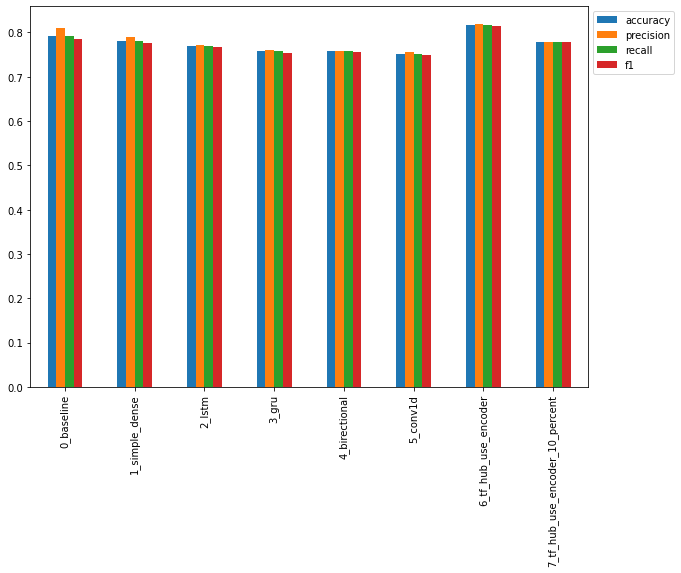

In [135]:
#Plot and compare all of the model resuts
all_model_results.plot(kind="bar",figsize=(10,7)).legend(bbox_to_anchor=(1.0,1.0))

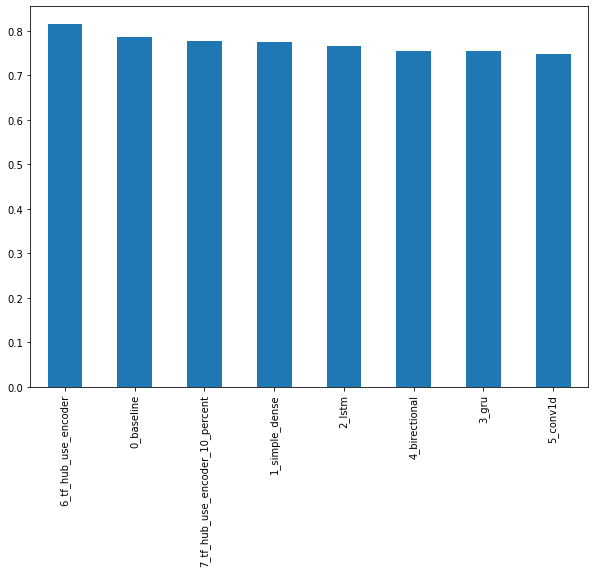

In [136]:
#Sort model results by F1-score
all_model_results.sort_values("f1",ascending=False)["f1"].plot(kind="bar",figsize=(10,7))

In [137]:
#Uploading our model training logs to Tensorboard.dev
#View tensorflow logs of transfer learning modelling experiments
!tensorboard dev upload --logdir ./model_logs/ \
 --name "NLP Modelling Experiment ZTM TF"\
 --description "Comparing multiple different types of model architecture on the Kaggle Tweets text classification dataset"\
 --one_shot 


***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

./model_logs/

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) yes

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=373649185512-8v619h5kft38l4456nm2dj4ubeqsrvh6.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=openid+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&state=4ePtBtzGYYEK4MSlKo8xOW7RlpXyhB&prompt=consent&access_type=offline

In [138]:
#Delete an experiment
!tensorboard dev list

https://tensorboard.dev/experiment/SZ6e4KpBRKqjUYMJn3i6Cw/
	Name                 NLP Modelling Experiment ZTM TF
	Description          Comparing multiple different types of model architecture on the Kaggle Tweets text classification dataset
	Id                   SZ6e4KpBRKqjUYMJn3i6Cw
	Created              2022-02-09 15:57:02 (18 minutes ago)
	Updated              2022-02-09 15:57:10 (18 minutes ago)
	Runs                 16
	Tags                 5
	Scalars              240
	Tensor bytes         0
	Binary object bytes  3807731
https://tensorboard.dev/experiment/awwmNdOXR6K9IGqhB3YDZw/
	Name                 Transfer Learning Expts with 10 Food101 Classes
	Description          A series of different transfer learning experiments with varying amounts of data and fine tuning
	Id                   awwmNdOXR6K9IGqhB3YDZw
	Created              2021-11-14 10:18:31
	Updated              2021-11-14 10:18:35
	Runs                 8
	Tags                 5
	Scalars              102
	Tensor bytes   

In [139]:
#!tensorboard dev delete --experiment_id SZ6e4KpBRKqjUYMJn3i6Cw

In [141]:
#Saving and loading a trained model
#Save using HDF5 format
model_6.save("model_6.h5")

In [142]:
#Load model with custom hub layer (required HDF5 format)
import tensorflow_hub as hub
loaded_model_6 = tf.keras.models.load_model("model_6.h5",
                                            custom_objects={"KerasLayer":hub.KerasLayer})

In [143]:
#How does loaded model perform
loaded_model_6.evaluate(val_sentences,val_labels)

24/24 [==============================] - 2s 31ms/step - loss: 0.4343 - accuracy: 0.8163


[0.4342726171016693, 0.8162729740142822]

In [144]:
#Save TF hub Sentence encoder model to savedmodel format
model_6.save("model_6_SavedModel_format")

INFO:tensorflow:Assets written to: model_6_SavedModel_format/assets


INFO:tensorflow:Assets written to: model_6_SavedModel_format/assets


In [145]:
#Load the model
loaded_model_6_SavedModel_format = tf.keras.models.load_model("model_6_SavedModel_format")

In [146]:
loaded_model_6_SavedModel_format.evaluate(val_sentences,val_labels)

24/24 [==============================] - 2s 31ms/step - loss: 0.4343 - accuracy: 0.8163


[0.4342726171016693, 0.8162729740142822]

In [147]:
#Finding the most wrong examples
#Download a pretrained model
#create Dataframe with validation sentences and best performing model predictions
!wget https://storage.googleapis.com/ztm_tf_course/08_model_6_USE_feature_extractor.zip
!unzip 08_model_6_USE_feature_extractor.zip

--2022-02-09 16:37:13--  https://storage.googleapis.com/ztm_tf_course/08_model_6_USE_feature_extractor.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 209.85.200.128, 209.85.234.128, 108.177.112.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|209.85.200.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 960779165 (916M) [application/zip]
Saving to: ‘08_model_6_USE_feature_extractor.zip’

08_model_6_USE_feat 100%[===================>] 916.27M  84.7MB/s    in 15s     

2022-02-09 16:37:28 (61.2 MB/s) - ‘08_model_6_USE_feature_extractor.zip’ saved [960779165/960779165]

Archive:  08_model_6_USE_feature_extractor.zip
   creating: 08_model_6_USE_feature_extractor/
   creating: 08_model_6_USE_feature_extractor/assets/
   creating: 08_model_6_USE_feature_extractor/variables/
  inflating: 08_model_6_USE_feature_extractor/variables/variables.data-00000-of-00001  
  inflating: 08_model_6_USE_feature_extractor/variables/variables.

In [148]:
#Import previously trained model from google storage
model_6_pretrained = tf.keras.models.load_model("08_model_6_USE_feature_extractor")
model_6_pretrained.evaluate(val_sentences,val_labels)

24/24 [==============================] - 2s 31ms/step - loss: 0.4272 - accuracy: 0.8163


[0.42723122239112854, 0.8162729740142822]

In [149]:
model_6_pretrained_pred_probs = model_6_pretrained.predict(val_sentences)
model_6_pretrained_preds = tf.squeeze(tf.round(model_6_pretrained_pred_probs))
model_6_pretrained_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [151]:
#Create dataframe with validation sentences, validation labels and best performing model predictions labels +probabilities
val_df = pd.DataFrame({"text":val_sentences,
                       "target":val_labels,
                       "pred":model_6_pretrained_preds,
                       "pred_prob":tf.squeeze(model_6_pretrained_pred_probs)})
val_df.head()

,text,target,pred,pred_prob
0,DFR EP016 Monthly Meltdown - On Dnbheaven 2015...,0,0.0,0.159757
1,FedEx no longer to transport bioterror germs i...,0,1.0,0.747162
2,Gunmen kill four in El Salvador bus attack: Su...,1,1.0,0.988749
3,@camilacabello97 Internally and externally scr...,1,0.0,0.196229
4,Radiation emergency #preparedness starts with ...,1,1.0,0.707808


In [153]:
#Find the wrong predictions and sort by prediction probabilities
most_wrong = val_df[val_df["target"] !=val_df["pred"]].sort_values("pred_prob",ascending=False)
most_wrong[:10] #False Positive

,text,target,pred,pred_prob
31,? High Skies - Burning Buildings ? http://t.co...,0,1.0,0.910196
759,FedEx will no longer transport bioterror patho...,0,1.0,0.876982
628,@noah_anyname That's where the concentration c...,0,1.0,0.852300
209,Ashes 2015: AustraliaÛªs collapse at Trent Br...,0,1.0,0.835454
251,@AshGhebranious civil rights continued in the ...,0,1.0,0.827213
393,@SonofLiberty357 all illuminated by the bright...,0,1.0,0.814816
109,[55436] 1950 LIONEL TRAINS SMOKE LOCOMOTIVES W...,0,1.0,0.810840
49,@madonnamking RSPCA site multiple 7 story high...,0,1.0,0.803122
119,@freefromwolves GodsLove &amp; #thankU brother...,0,1.0,0.766901
344,Air Group is here to the rescue! We have 24/7 ...,0,1.0,0.766625


In [154]:
most_wrong.tail() #False negatives

,text,target,pred,pred_prob
411,@SoonerMagic_ I mean I'm a fan but I don't nee...,1,0.0,0.043918
233,I get to smoke my shit in peace,1,0.0,0.042087
38,Why are you deluged with low self-image? Take ...,1,0.0,0.038998
244,Reddit Will Now QuarantineÛ_ http://t.co/pkUA...,1,0.0,0.038949
23,Ron &amp; Fez - Dave's High School Crush https...,1,0.0,0.037186


In [155]:
#Check the false positives (model predicted 1 when shoud have been 0)
for row in most_wrong[:10].itertuples():
  _, text,target,pred,pred_prob = row
  print(f"Target: {target}, Pred: {pred},Prob:{pred_prob}")
  print(f"Text: \n{text}\n")
  print("----\n")

Target: 0, Pred: 1.0,Prob:0.9101957678794861
Text: 
? High Skies - Burning Buildings ? http://t.co/uVq41i3Kx2 #nowplaying

----

Target: 0, Pred: 1.0,Prob:0.8769821524620056
Text: 
FedEx will no longer transport bioterror pathogens in wake of anthrax lab mishaps http://t.co/lHpgxc4b8J

----

Target: 0, Pred: 1.0,Prob:0.8523000478744507
Text: 
@noah_anyname That's where the concentration camps and mass murder come in. 
 
EVERY. FUCKING. TIME.

----

Target: 0, Pred: 1.0,Prob:0.8354544043540955
Text: 
Ashes 2015: AustraliaÛªs collapse at Trent Bridge among worst in history: England bundled out Australia for 60 ... http://t.co/t5TrhjUAU0

----

Target: 0, Pred: 1.0,Prob:0.8272134065628052
Text: 
@AshGhebranious civil rights continued in the 60s. And what about trans-generational trauma? if anything we should listen to the Americans.

----

Target: 0, Pred: 1.0,Prob:0.814815878868103
Text: 
@SonofLiberty357 all illuminated by the brightly burning buildings all around the town!

----

Targ

In [156]:
#Check the false negatives (model predicted 0 when shoud have been 1)
for row in most_wrong[-10:].itertuples():
  _, text,target,pred,pred_prob = row
  print(f"Target: {target}, Pred: {pred},Prob:{pred_prob}")
  print(f"Text: \n{text}\n")
  print("----\n")

Target: 1, Pred: 0.0,Prob:0.06730346381664276
Text: 
@DavidVonderhaar At least you were sincere ??

----

Target: 1, Pred: 0.0,Prob:0.05507582053542137
Text: 
@willienelson We need help! Horses will die!Please RT &amp; sign petition!Take a stand &amp; be a voice for them! #gilbert23 https://t.co/e8dl1lNCVu

----

Target: 1, Pred: 0.0,Prob:0.05460336431860924
Text: 
Lucas Duda is Ghost Rider. Not the Nic Cage version but an actual 'engulfed in flames' badass. #Mets

----

Target: 1, Pred: 0.0,Prob:0.05459698289632797
Text: 
going to redo my nails and watch behind the scenes of desolation of smaug ayyy

----

Target: 1, Pred: 0.0,Prob:0.04963727295398712
Text: 
You can never escape me. Bullets don't harm me. Nothing harms me. But I know pain. I know pain. Sometimes I share it. With someone like you.

----

Target: 1, Pred: 0.0,Prob:0.043918490409851074
Text: 
@SoonerMagic_ I mean I'm a fan but I don't need a girl sounding off like a damn siren

----

Target: 1, Pred: 0.0,Prob:0.042086832

In [157]:
test_df

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


In [161]:
#Making predictions on the test dataset and visualizing them
test_sentences = test_df["text"].to_list()
test_samples = random.sample(test_sentences,10)
for test_sample in test_samples:
  pred_prob = tf.squeeze(model_6_pretrained.predict([test_sample]))
  pred = tf.round(pred_prob)
  print(f"Pred: {int(pred)},Prob: {pred_prob}")
  print(f"Text:\n{test_sample}\n")
  print("---\n")

Pred: 1,Prob: 0.9366454482078552
Text:
What if your hometown were hit by the Hiroshima atomic bomb? http://t.co/XuWN4McgYp #safemode

---

Pred: 0,Prob: 0.2857551574707031
Text:
The footage of Albert Reynolds talking about a hijacker demanding the publication of the 3rd secret of Fatima is hilarious.

---

Pred: 1,Prob: 0.9890894293785095
Text:
Landslide in Italian Alps kills three: ROME (Reuters) - Three people were killed when a severe rainstorm in th... http://t.co/2pZ9t2FnSz

---

Pred: 0,Prob: 0.18787315487861633
Text:
@RaynbowAffair Editor In Chief @DiamondKesawn Releases Issue #7 http://t.co/UH6mXI0Uwz of #RAmag. #Fashion #Models and #Mayhem

---

Pred: 1,Prob: 0.9698418378829956
Text:
More Severe Weather Heads Toward Chicago Area: A brief violent storm swept through the Chicago area Sunday af... http://t.co/JWSLLsuKjg

---

Pred: 0,Prob: 0.14728482067584991
Text:
So wait he really not gonna tell his wife that he is a mass murderer now and a cheat #derailed @itv2...I'm done with

In [162]:
#The speed/score tradeoff
import time
def pred_timer(model,samples):
  start_time = time.perf_counter()
  model.predict(samples)
  end_time = time.perf_counter()
  total_time = end_time-start_time
  time_per_pred = total_time/len(samples)
  return total_time,time_per_pred

In [163]:
#Calculate tf hub sentence encoder time per pred
model_6_total_pred_time,model_6_time_per_pred = pred_timer(model=model_6_pretrained,
                                                           samples=val_sentences)
model_6_total_pred_time,model_6_time_per_pred

(0.7844972950006195, 0.0010295240091871647)

In [165]:
#Calculate our baseline time
baseline_total_pred_time,baseline_time_per_pred = pred_timer(model=model_0,
                                                           samples=val_sentences)
baseline_total_pred_time,baseline_time_per_pred

(0.04667872400023043, 6.125816797930503e-05)

In [166]:
model_6_pretrained_results = calculate_results(y_true=val_labels,
                                               y_pred=model_6_pretrained_preds)
model_6_pretrained_results

{'accuracy': 81.62729658792651,
 'f1': 0.8148082644367335,
 'precision': 0.818446310697231,
 'recall': 0.8162729658792651}

Text(0, 0.5, 'F1-score')

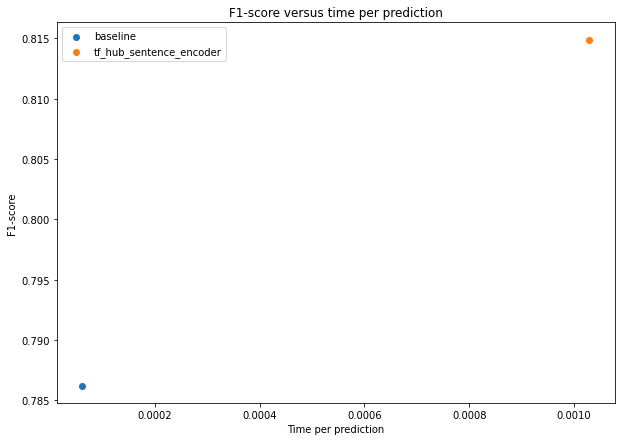

In [168]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.scatter(baseline_time_per_pred,baseline_results["f1"],label="baseline")
plt.scatter(model_6_time_per_pred,model_6_results["f1"],label="tf_hub_sentence_encoder")
plt.legend()
plt.title("F1-score versus time per prediction")
plt.xlabel("Time per prediction")
plt.ylabel("F1-score")